# 실습3. 수치적분 방법에 따른 근의 정확도

Prob1. 오일러 방법을 활용한 오차분석 그래프

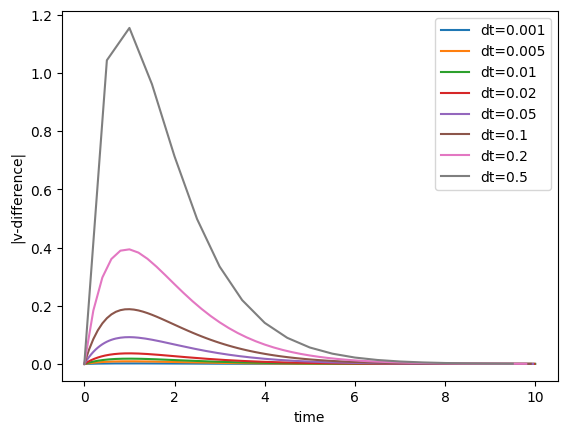

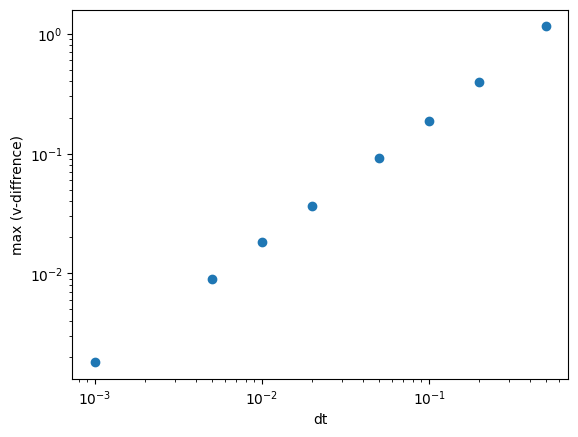

In [1]:
import numpy as np, matplotlib.pyplot as plt

def Analytic_v(t):
  return (g/gamma*(1-np.exp(-gamma*t)))

def v_diff(dt):
  v=0.0
  t_arr = []
  vdiff_arr = []

  for t in np.arange(0, maxt, dt):
    t_arr.append(t)
    vdiff_arr.append(abs(v-Analytic_v(t)))

    v+=dt*(g-gamma*v)
  return (t_arr, vdiff_arr)

g = 9.8; gamma = 1.0; maxt = 10.0

dtlist = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]
maxerr_list = []

for dt in dtlist:
  t, vdiff = v_diff(dt)
  maxerr = max (vdiff)
  maxerr_list.append(maxerr)
  plt.plot(t, vdiff, label='dt=%g' %dt)

plt.legend()
plt.xlabel("time")
plt.ylabel("|v-difference|")
plt.show()

plt.plot(dtlist, maxerr_list, "o")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("dt")
plt.ylabel("max (v-diffrence)")
plt.show()

위의 코드는 오일러 방법을 활용하여 dt에 따라 공기저항이 있는 물체의 낙하속력 v의 근삿값을 구한 뒤, 시간에 대한 참값과의 오차와 각 dt에서의 오차의 최댓값을 그래프로 나타낸 코드이다. \\
사용자 정의함수 Analytic_v(t)는 시간 t에 따른 물체의 속력의 참값으로, $v=\dfrac{g}{\gamma}(1-e^{-\gamma t})$의 값을 가진다. \\
사용자 정의함수 v_diff(dt)는 dt값에 따른 참값과 근삿값의 절댓값 오차를 구하는 함수이다. 변수 v는 물체의 초기속도로, 0으로 설정하였다. 리스트 t_arr와 vdiff_arr는 각각 시간과 절댓값 오차를 저장한다. 이후 for문을 통해 0초부터 maxt초 까지 dt의 시간간격을 통해 속도의 절댓값 오차를 구한 뒤 리스트에 저장하고 v를 업데이트 한다. for문 내의

```
 v+=dt*(g-gamma*v)
```
는 오일러 방법의 $x(t+dt) = x(t) + f(x)dt$ 공식을 의미한다. 이후 최종적으로 t_arr와 vdiff_arr를 반환한다. \\
변수 g는 중력가속도를 의미하며, 9.8으로 선언하였다. gamma는 공기 저항상수를 의미하며, 1.0으로 선언하였다. maxt는 시간의 최댓값을 의미하며, 본 코드에서는 10초로 선언하였다.
리스트 dtlist는 시간간격 dt를 담은 리스트로, 0.001 ~ 0.5 사이의 값을 원소로 가진다. maxerr_list는 각 dt의 최대 절댓값 오차를 저장하는 리스트이다. 이후 for문을 통해 dtlist 내의 각 원소에 대해 최대 절댓값오차를 찾은 뒤 이를 변수 maxerr에 저장한 뒤 이를 maxerr_list에 저장한다.

Prob2. 수정-오일러 방법

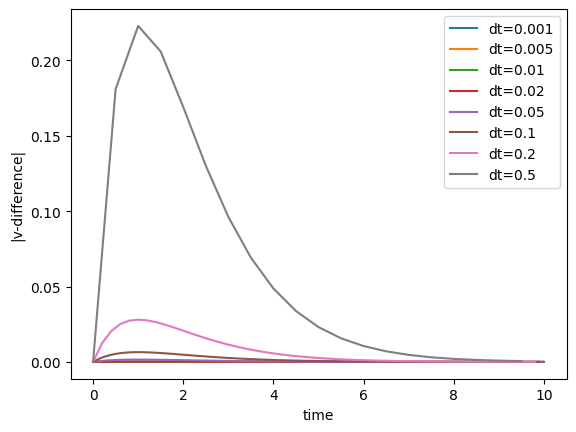

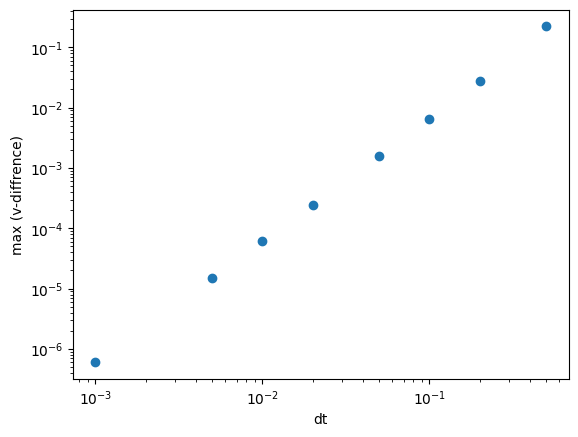

In [ ]:
import numpy as np, matplotlib.pyplot as plt

def Analytic_v(t):
  return (g/gamma*(1-np.exp(-gamma*t)))

def v_diff(dt):
  v=0.0
  t_arr = []
  vdiff_arr = []

  for t in np.arange(0, maxt, dt):
    t_arr.append(t)
    vdiff_arr.append(abs(v-Analytic_v(t)))

    a=g-gamma*v
    vbar = v+a*dt
    abar = g-gamma*vbar
    v+=dt*(a+abar)/2
  return (t_arr, vdiff_arr)

g = 9.8; gamma = 1.0; dt = 0.05; maxt = 10.0

dtlist = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]
maxerr_list = []

for dt in dtlist:
  t, vdiff = v_diff(dt)
  maxerr = max (vdiff)
  maxerr_list.append(maxerr)
  plt.plot(t, vdiff, label='dt=%g' %dt)

plt.legend()
plt.xlabel("time")
plt.ylabel("|v-difference|")
plt.show()

plt.plot(dtlist, maxerr_list, "o")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("dt")
plt.ylabel("max (v-diffrence)")
plt.show()

위의 코드는 1번의 코드에서 v_diff(dt) 내의 속도 업데이트 함수를 수정-오일러 방법으로 변환한 코드이다. \\
for문 내의

```
a=g-gamma*v
vbar = v+a*dt
abar = g-gamma*vbar
v+=dt*(a+abar)/2
```
는 수정-오일러 방법의 $x(t+dt) = x(t) + \dfrac{f(x) + f(\bar x)}{2}$, $\bar x \equiv x(t+dt) = x(t) + dt f(x)$ 공식을 나타내는 코드이다.

Prob3. 2차 룬제-쿠타 방법

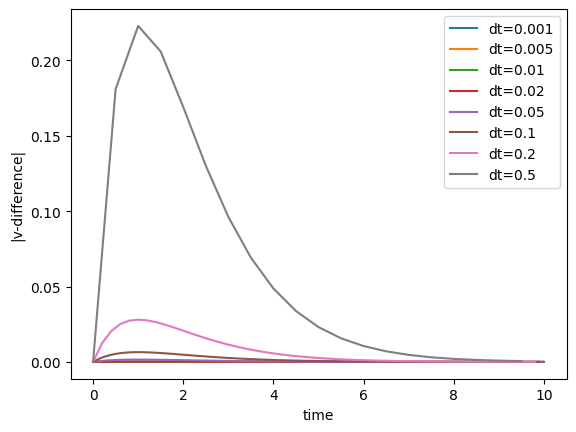

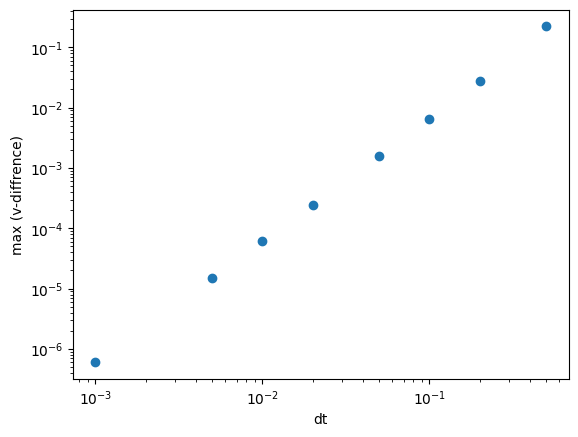

In [ ]:
import numpy as np, matplotlib.pyplot as plt

def Analytic_v(t):
  return (g/gamma*(1-np.exp(-gamma*t)))

def v_diff(dt):
  v=0.0
  t_arr = []
  vdiff_arr = []

  for t in np.arange(0, maxt, dt):
    t_arr.append(t)
    vdiff_arr.append(abs(v-Analytic_v(t)))

    a=g-gamma*v
    vbar = v+0.5*a*dt
    abar = g-gamma*vbar
    v+=dt*abar
  return (t_arr, vdiff_arr)

g = 9.8; gamma = 1.0; dt = 0.05; maxt = 10.0

dtlist = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]
maxerr_list = []

for dt in dtlist:
  t, vdiff = v_diff(dt)
  maxerr = max (vdiff)
  maxerr_list.append(maxerr)
  plt.plot(t, vdiff, label='dt=%g' %dt)

plt.legend()
plt.xlabel("time")
plt.ylabel("|v-difference|")
plt.show()

plt.plot(dtlist, maxerr_list, "o")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("dt")
plt.ylabel("max (v-diffrence)")
plt.show()

위의 코드는 1번의 코드에서 v_diff(dt) 내의 속도 업데이트 함수를 2차 룬제-쿠타 방법으로 변환한 코드이다. \\
for문 내의

```
a=g-gamma*v
vbar = v+0.5*a*dt
abar = g-gamma*vbar
v+=dt*abar
```
는 2차 룬제-쿠타 방법의 $x(t+dt) = x(t) + f(\bar x)dt$, $\bar x \equiv x(t+\dfrac{dt}{2}) = x(t) + \dfrac{dt}{2} f(x)$ 공식을 나타내는 코드이다.